In [248]:
#This is the code for the 1D heat transfer problem. The code is written in python and is based on the finite difference method. The code is written in a way that it can be easily modified to solve other 1D heat transfer problems.
    

In [249]:
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt  # import matplotlib.pyplot library as plt
import csv # import csv module

Initialise the parameters

In [250]:
# Parameters
alpha = 0.5  # Thermal diffusivity
length = 1.0  # Length of the rod
time_end = 1  # End time
num_points = 30  # Number of spatial points
num_steps = 1000  # Number of time steps

#Grid space and time step

In [251]:
# Spatial and time step sizes
dx = length / (num_points - 1) # Grid spacing
dt = time_end / num_steps # Time step size
print(dt)

0.001


#Inital condition

In [252]:
# Initial condition
initial_temperature = np.zeros(num_points) # Initialize temperature array with zeros
print(initial_temperature)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [253]:

# Set one end at 25 degrees and the other end at 600 degrees
initial_temperature[0:num_points-1] = 100.0  # Set the first element (one end) to 25 degrees
initial_temperature[-1] = 600.0  # Set the last element (other end) to 600 degrees

# Initialize temperature array
temperature = initial_temperature.copy() # Copy initial_temperature to temperature
temperature = temperature.astype(np.float64)
print(temperature)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 600.]


#Finite Difference method

In [254]:
# Finite difference method
for n in range(1, num_steps + 1):# Loop through time steps
    # Compute new temperature values using finite difference
    temperature[1:-1] = (temperature[1:-1] + alpha * (dt / dx**2) * (temperature[2:] - 2 * temperature[1:-1] + temperature[:-2])  )
    


print(temperature)

[100.         116.99592554 133.9947288  150.99925376 168.01227732
 185.03647673 202.07439823 219.12842718 236.20076009 253.29337887
 270.4080276  287.54619209 304.70908243 321.89761885 339.11242087
 356.3538001  373.62175654 390.9159786  408.23584674 425.58044077
 442.94855058 460.33869038 477.74911608 495.17784578 512.62268296
 530.08124226 547.55097745 565.02921125 582.51316676 600.        ]


#Plotting of the results

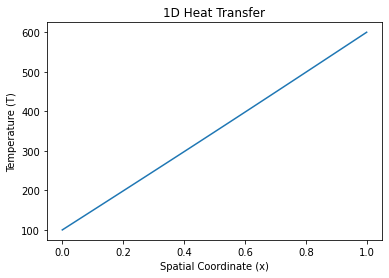

In [255]:
# Plot the results
plt.plot(np.linspace(0, length, num_points), temperature)
plt.xlabel('Spatial Coordinate (x)')
plt.ylabel('Temperature (T)')
plt.title('1D Heat Transfer')
plt.show()

#Save Data to CSV file

In [256]:
# Save data to CSV file
data = np.column_stack((np.linspace(0, length, num_points), temperature))
csv_filename = 'heat_transfer_data.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Spatial Coordinate (x)', 'Temperature (T)'])
    csv_writer.writerows(data)

print(f'Data saved to {csv_filename}')

Data saved to heat_transfer_data.csv
